In [19]:
import pandas as pd

df = pd.read_csv('my-encoded-data.csv')
df

,visitNumber,visitStartTime,isMobile,subContinent,country,region,metro,city,networkDomain,hits,...,Data Share,Data Share Promo,Retail (DO NOT EDIT owners nophakun and tianyu),test-liyuhz,(none),affiliate,cpc,cpm,organic,referral
0,1,1472830385,0,21,204,150,0,258,24932,1,...,0,0,0,0,0,0,0,0,1,0
1,1,1472880147,0,1,12,375,93,648,6673,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1472865386,0,19,181,78,0,325,25841,1,...,0,0,0,0,0,0,0,0,1,0
3,1,1472881213,0,16,94,375,93,648,25841,1,...,0,0,0,0,0,0,0,0,1,0
4,2,1472822600,1,13,211,375,93,648,25841,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,1,1483554750,0,2,161,375,93,648,19523,17,...,0,0,0,0,0,0,0,0,0,1
903649,1,1483543798,1,18,182,375,93,648,25841,18,...,0,0,0,0,0,0,0,0,0,1
903650,1,1483526434,1,6,180,291,0,533,25841,24,...,0,0,0,0,0,0,0,0,0,1
903651,1,1483592864,0,16,94,375,93,648,25841,24,...,0,0,0,0,0,0,0,0,0,1


In [21]:
from datetime import datetime

df['visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
df.drop(['visitStartTime'], axis=1, inplace=True)
print(sorted(df['visitHour'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


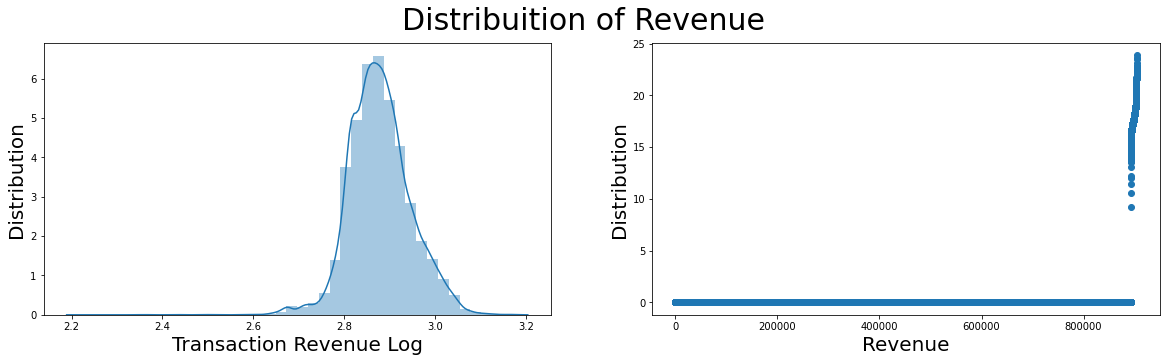

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns 

fig = plt.figure(figsize=(20,5))
plt.suptitle('Distribuition of Revenue', fontsize=30)

ax1 = fig.add_subplot(121)
_ = sns.distplot(np.log(df[df['transactionRevenue'] > 0]['transactionRevenue']), bins=40, ax=ax1)
_ = ax1.set_ylabel('Distribution', fontsize=20)
_ = ax1.set_xlabel('Transaction Revenue Log', fontsize=20)


ax2 = fig.add_subplot(122)
_ = plt.scatter(range(df['transactionRevenue'].shape[0]), np.sort(df['transactionRevenue'].values))
_ = ax2.set_ylabel('Distribution', fontsize=20)
_ = ax2.set_xlabel('Revenue', fontsize=20)

In [45]:
import numpy as np

df['transactionRevenue'] = df['transactionRevenue'].apply(lambda x: np.log1p(x))

In [46]:
y = df['transactionRevenue'] 
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
903648    0.0
903649    0.0
903650    0.0
903651    0.0
903652    0.0
Name: transactionRevenue, Length: 903653, dtype: float64

In [47]:
cols = df.columns.tolist()
cols.remove('transactionRevenue')
X = df[cols]
X

,visitNumber,isMobile,subContinent,country,region,metro,city,networkDomain,hits,pageviews,...,Data Share Promo,Retail (DO NOT EDIT owners nophakun and tianyu),test-liyuhz,(none),affiliate,cpc,cpm,organic,referral,visitHour
0,1,0,21,204,150,0,258,24932,1,1.0,...,0,0,0,0,0,0,0,1,0,8
1,1,0,1,12,375,93,648,6673,1,1.0,...,0,0,0,0,0,0,0,1,0,22
2,1,0,19,181,78,0,325,25841,1,1.0,...,0,0,0,0,0,0,0,1,0,18
3,1,0,16,94,375,93,648,25841,1,1.0,...,0,0,0,0,0,0,0,1,0,22
4,2,1,13,211,375,93,648,25841,1,1.0,...,0,0,0,0,0,0,0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903648,1,0,2,161,375,93,648,19523,17,15.0,...,0,0,0,0,0,0,0,0,1,10
903649,1,1,18,182,375,93,648,25841,18,13.0,...,0,0,0,0,0,0,0,0,1,7
903650,1,1,6,180,291,0,533,25841,24,21.0,...,0,0,0,0,0,0,0,0,1,2
903651,1,0,16,94,375,93,648,25841,24,22.0,...,0,0,0,0,0,0,0,0,1,21


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [49]:
from sklearn.ensemble import RandomForestRegressor

randomForrest = RandomForestRegressor()
randomForrest.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
hyp = randomForrest.predict(X_test)
hyp[hyp < 0] = 0.0
np.sqrt(mean_squared_error(y_test, hyp))

0.2732451670467921

In [52]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor()
bagging.fit(X_train, y_train)

hyp = bagging.predict(X_test)
hyp[hyp < 0] = 0.0
np.sqrt(mean_squared_error(y_test, hyp))

0.2865304879920272

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gradientBoosting = GradientBoostingRegressor()
gradientBoosting.fit(X_train, y_train)

hyp = gradientBoosting.predict(X_test)
hyp[hyp < 0] = 0.0
np.sqrt(mean_squared_error(y_test, hyp))

0.27012867440546123

In [54]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

hyp = ada.predict(X_test)
hyp[hyp < 0] = 0.0
np.sqrt(mean_squared_error(y_test, hyp))

0.38098553872150326

In [32]:
# from pprint import pprint

In [33]:
# from pprint import pprint
# # Look at parameters used by our current forest

# print('Parameters currently in use:\n')
# pprint(randomForrest.get_params())

In [34]:
# n_estimators = number of trees in the foreset
# max_features = max number of features considered for splitting a node
# max_depth = max number of levels in each decision tree
# min_samples_split = min number of data points placed in a node before the node is split
# min_samples_leaf = min number of data points allowed in a leaf node
# bootstrap = method for sampling data points (with or without replacement)

In [35]:
# from sklearn.model_selection import RandomizedSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# # # Number of features to consider at every split
# # max_features = ['auto', 'sqrt']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# # # Minimum number of samples required to split a node
# # min_samples_split = [2, 5, 10]

# # # Minimum number of samples required at each leaf node
# # min_samples_leaf = [1, 2, 4]

# # # Method of selecting samples for training each tree
# # bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
# #                'max_features': max_features,
#                'max_depth': max_depth
# #                'min_samples_split': min_samples_split,
# #                'min_samples_leaf': min_samples_leaf,
# #                'bootstrap': bootstrap
#               }

# pprint(random_grid)

In [36]:
# from sklearn.ensemble import RandomForestRegressor

# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [37]:
# rf_random.best_params_

In [38]:
# hyp = rf_random.best_estimator_.predict(X_test)
# hyp[hyp < 0] = 0.0
# np.sqrt(mean_squared_error(y_test, hyp))

In [39]:
# from sklearn.model_selection import GridSearchCV

# # Create the parameter grid based on the results of random search 
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [80, 90, 100, 110],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# # Create a based model
# rf = RandomForestRegressor()

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [40]:
# grid_search.best_params_

In [41]:
# hyp = grid_search.best_estimator_.predict(X_test)
# hyp[hyp < 0] = 0.0
# np.sqrt(mean_squared_error(y_test, hyp))